# 1. Fully connected neural networks

Neural networks (NNs) are a family of extremely versatile machine learning algorithms, that can be used to study any supervised learning tasks, such as classification or regression problems. We begin to get acquainted with NNs by looking at a famous example of classifying images of handwritten digits. For implementing NN models with Python, we use the **Keras** library, that can be accessed from the **TensorFlow** platform. Therefore, in order to be able to execute the code cells in this document, you'll need to install TensorFlow first, using *e.g.* the Python Packages manager.

## First example with MNIST data

First, run the following cell for the necessary imports (their significance will become clear later on):

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Next, we download the MNIST dataset, which comes with Tensorflow and contains 28 x 28 pixel images of handwritten digits, labelled 0-9. The data ends up in four different NumPy tensors: `x_train` and `y_train` contain the input features and target labels for the training samples, and `x_test` and `y_test` the same for the test samples. 

The training set consists of 60000 image samples, and the test set a further 10000 samples.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

First, we do some basic preprocessing: the input features (pixel values), that originally vary in the range 0 ... 255, are divided by 255 to convert them to range 0 ... 1. In addition, the labels are one-hot-encoded (with the Keras function `to_categorical`) from their original integer-valued form; this ensures that any two different labels are equidistant from each other. For example, the label 4 is converted to the form [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]. 

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Now we determine the structure (architecture) of our simple neural network. First we create an instance of class `Sequential`, which corresponds to a neural network consisting of layers stacked one after another (most of them are of this kind).

This particular neural network model has three layers; ignore their details for now, as we'll look at them more closely below.

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Next the model needs to be compiled, which means providing the learning algorithm some information about training and performance monitoring. Again, we'll look at the details more closely below. 

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Now the model can be trained with the training data:

In [6]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2584 - accuracy: 0.9264
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1136 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0577 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0444 - accuracy: 0.9862


Now that our model has been trained, we can use it to predict the labels of the samples in the test set (which the model has so far not been exposed to), and evaluate the classification accuracy. We observe that, even this fairly simple model is able to predict the labels with accuracy that is above 97%.

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 1ms/step - loss: 0.0848 - accuracy: 0.9757
Test accuracy: 0.9757000207901001


## Stages of deep learning

The above example contains all the essential stages of **deep learning** (*i.e.*, machine learning with NNs) experiments:

* **Download the data**: prepare separate sets for training and testing as NumPy arrays
* **Preprocess the data**: standardize/normalize input features, one-hot-encode categorical variables
* **Build the model**: define the architecture and the various layers
* **Compile the model**: specify the details for the learning algorithm and monitored metrics
* **Train the model**: allow the learning algorithm to find good parameter values for the model
* **Evaluate the model**: test the performance with new, previously unseen data

It is useful to think of a neural network as an information-processing unit. Input data enters the network in the form of a tensor, which is a multidimensional array of numbers. The first layer of the network modifies this tensor, and outputs a new one, which then enters the second layer as an input. The data then flows through the network from one layer to the next, and gets modified every step of the way, finally coming out as predictions for the target values. In other words, a neural network aims to model the connection between the inputs and outputs.

In the example above, the first layer (the *Flatten* layer) only reshapes the input tensor. Originally, the shape of the tensor containing the input features in the training samples is 

In [8]:
x_train.shape

(60000, 28, 28)

That is, the three-dimensional input tensor contains 60000 samples, each determined by 28 times 28 pixel values: the first index determines the sample, and the second and third index point to the row and column of the collection of pixel values defining the image. The cell below shows one example of the input samples.

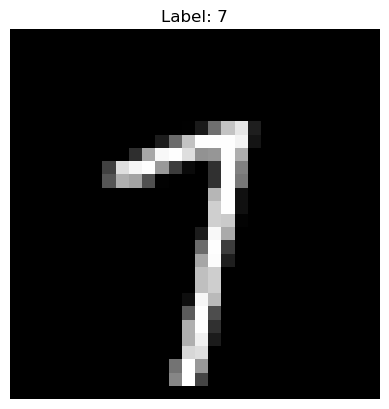

In [9]:
import matplotlib.pyplot as plt

# Visualize a sample image
sample_number = 42
plt.imshow(x_train[sample_number], cmap='gray')
plt.title(f'Label: {y_train[sample_number].argmax()}')  # Use .argmax() to get the label as an integer
plt.axis('off')  # Hide the axes
plt.show()

The first layer of the neural network model merely reshapes the input tensor from a three-dimensional to two-dimensional form: instead of a 2D table of 28 x 28 numerical values, each sample becomes a 1D vector of 28 x 28 = 784 numerical values. 

Following the Flatten layer, the above model has two additional *Dense* layers. These layers perform a somewhat more complex computation. To understand that, we need to consider the mathematics of neural networks in more detail.

### Single neuron

Neural networks consist of a large number of similar unit entities, neurons, arranged in layers. Each of the neurons performs a similar kind of computation: it takes in a collection of input values, and produces a single number as an output. The computation takes place in two stages: 1) **weighted sum**, followed by 2) **activation function**.

Assume that an individual neuron takes in N inputs: $x_{1}, x_{2}, ..., x_{N}$. Such a neuron has N parameters called **weights**, $w_{1}, w_{2}, ..., w_{N}$, and a **bias** parameter $b$. First, the neuron computes a weighted sum $z$ of the inputs as follows:

$$
z = w_{1}x_{1} + w_{2}x_{2} + ... + w_{N}x_{N} + b
$$
After this, the final output $y$ of the neuron is obtained from

$$
y = f(z)
$$
where the function $f$ is called an **activation function**. Common choices for activation functions are the sigmoid

$$
f(z) = \frac{1}{e^{-x}+1}
$$ 
and the ReLU (rectified linear unit)

$$
f(z) = \begin{cases} 
z & \hspace{1cm} z > 0 \\
0 & \hspace{1cm} \text{otherwise} 
\end{cases} 
$$
The activation functions are typically chosen to be nonlinear (as the two examples above are) to increase the complexity of the computation performed by the neurons and, therefore, to be able to model complex behavior.

### Fully connected (Dense) layer

A **fully connected** (FC) layer &ndash; or *Dense* layer, as they are referred to in Keras &ndash; is simply a collection of several neurons, each having their individual set of weight and bias values. For example, the second layer in our model above has a total of 128 neurons. Each of these 128 neurons takes all 784 pixel values of each sample in as input; each neuron also has 128 weights and one bias value, and they compute a weighted sum of the 784 input features. Next, each of these 784 intermediate outputs are inserted in the activation function (this is the same for all 128 neurons in the layer), producing the final output of 128 values. In this way, the dense layer processes the original 1D vector of 784 values to another 1D vector of 128 values. This information then continues to the next layer as an input.

As the MNIST model is a fairly large one, let us first take a look at a much simpler FC neural network with similar structure, shown in the image below:

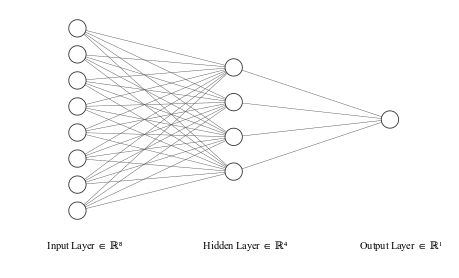

In [10]:
from IPython.display import Image,display;display(Image(filename="Images/nn.png"))

(image generated with [https://alexlenail.me/NN-SVG/](https://alexlenail.me/NN-SVG/))

This model consists of three layers: input layer, hidden layer, and output layer. The first **input layer** only represents the input features of a single sample: in this example, there are eight such features (in the above MNIST example, there are 784 of them). The next layer, **hidden layer**, consists of four neurons (in the MNIST model, there are 128 neurons in the hidden layer). In an FC model, each of them receives all the elements in the previous input layer as inputs; this is signified by the lines connecting the input-layer elements to the hidden-layer neurons. Each of these four neurons then performs its own individual calculation (weighted sum followed by activation function), and produces an output. Next, these four numerical output values enter the final **output layer** as inputs. Finally, the single neuron in the output layer (instead of ten in the MNIST model) then computes the final output of the neural network, which corresponds to the prediction for the sample under consideration; with sigmoid activation, this value would be in the range 0 ... 1, and could be identified with a class probability in a binary classification problem.

In the MNIST example, the output layer is associated with a special activation function called **softmax**, which involves all the ten neuron units together. This function is defined as 

$$
y_{i} = \frac{e^{z_{i}}}{\Sigma_{j} \hspace{2mm} e^{z_{j}}},
$$
where $z_{i}$ is the weighted sum and $y_{i}$ is the final output of a particular output-layer neuron denoted by the index $i$ (in MNIST example, $i$ = 0, ..., 9). Note that the definition of the softmax function ensures that all the outputs are in the range 0 ... 1, and their total sum is 1. Therefore, the output produced by softmax can conveniently be interpreted as a *probability distribution*, and is commonly used in the context of multiclass classification problems such as the MNIST task.  

All FC neural networks have an input layer, and an output layer, but there can be any number of intermediate hidden layers; in fact, large models (such as those used in self-driving cars) might have hundreds of them. The computation proceeds in a similar manner, however, from one layer to the next in the sequence of layers. The process of calculating the outputs (target predictions) from the inputs, with information flowing through the neural network, is called **forward pass**.

### Trainable parameters

A neural network outputs a certain function of its inputs. The details of this function are determined by the weights and biases of its neuron units. For example, the hidden layer of the simple FC neural network in the previous image has four neurons connected to eight input values (each having 8 weights and one bias value); this layer then has altogether 4 $\cdot$ (8 + 1) = 36 parameter. In the output layer, there are 3 $\cdot$ (4 + 1) = 15 further parameters, leading to the total of 36 + 15 = 51 parameters.

The much larger MNIST model has 128 $\cdot$ (784 + 1) + 10 $\cdot$ (128 + 1) = 101770 tunable parameters, and is able to tackle the fairly complicated problem of classifying handwritten digits into 10 distinct classes. The numbers of parameters in various layers of the network can conveniently be found out as follows:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


When training the network, we would like to fix the values of its parameters so that the resulting function accurately represents the connection between the inputs and outputs. Happily, this parameter-value tuning happens automatically, without any direct involvement of the programmer. This happens as follows:

* First, all the parameter values are initialized, typically with small random numbers.
* Then, a subset of training samples, a **batch**, is selected from the training set, and predictions are computed for these samples.
* Next, the predictions are compared with the true target labels, and the prediction error is quantified with a suitably chosen **loss function**.
* The parameters (weights and biases) of the network are updated in order to *decrease the loss*.
* After each update, a new batch of samples is selected, and the process is repeated.

The above process of alternating forward passes and parameter updates are repeated until the training is completed, and the loss value no longer decreases appreciably with further iterations (or some other suitable stopping criterion is reached). At this point, the values of the trainable parameters (weights and biases) in the network should be well adapted to model the connection between the inputs and targets. The trained model can then be used to compute predictions for new samples in a separate test set, to assess its performance.

In the MNIST example, the batch size of 32 (a parameter to the `fit` method) means that the prediction-update computations are performed to subsets of 32 samples at a time. These subsets are drawn randomly from the training set without replacement. When the entire training set has been used, the first training **epoch** terminates. The number of training epochs needs to be given to the fit method as well; in our example, the training time was set to five epochs (the samples in the training set were traversed through five times).  

In the compilation stage, some details concerning the training process are specified. Keras offers a selection of **optimizers**, which are programs that take care of the parameter updates during training. Here we do not delve into their computational details; see [https://keras.io/api/optimizers/](https://keras.io/api/optimizers/) for a list of available choices. The loss function is also specified here: for multiclass classification problems such as the MNIST problem, the appropriate choice is *categorical cross entropy*; we shall return to this issue later in more detail. Finally, the monitored metrics shown during training are specified: here we chose to look at accuracy in addition to the loss value, which is always presented. 

**NOTE**: There are different kinds of parameters to deep learning, which can sometimes cause confusion. First, there are the **trainable parameters**, the weights and biases of the network, whose values change iteratively during training. In addition, however, the NN models also have **hyperparameters** that define the structure of the model: the number of hidden layers, and the number of neurons in each layer. Unlike the trainable parameters, these need to be selected beforehand by the programmer, and their values do not change during training. In fact, choosing appropriate and sensible values for the model hyperparameters is the most important (and difficult) part of any deep learning project.